# Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("datasets/titanic/train.csv")
test_data = pd.read_csv("datasets/titanic/test.csv")

# 1. Titanic dataset Information

In [3]:
#overview
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- test data를 토대로 train data Survived를 예측하면 된다는 것을 알 수 있다.

## 1.1. variables

- **PassengerId** : 승객 아이디 / 불필요하다.
- **Survived** : 생존여부 (0 = N0, 1 = Yes)
- **Pclass** : 티켓 등급
- **Name** : 이름 
- **Sex** : 성별 
- **Age** : 나이 
- **SibSp** : 형제자매, 배우자 수 	
- **Parch**	: 부모, 자녀 수 // SibSp와 합쳐 FamilySize로 사용이 가능하다.
- **Ticket** 
- **Fare** : 비용
- **Cabin**	
- **Embarked** : 도착 장소 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# data types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. Missing data
<br>

변수의 결측치를 찾아 보정해주는 과정을 진행한다. 70%가 넘으면 해당 변수를 삭제할 예정이며, 70% 이하인 경우에는 해당 변수의 특징을 찾아 결측치를 보정할 예정이다. 

In [7]:
def draw_missing_data_table (df) :
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
draw_missing_data_table(train_data)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [9]:
draw_missing_data_table(test_data)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


<Axes: >

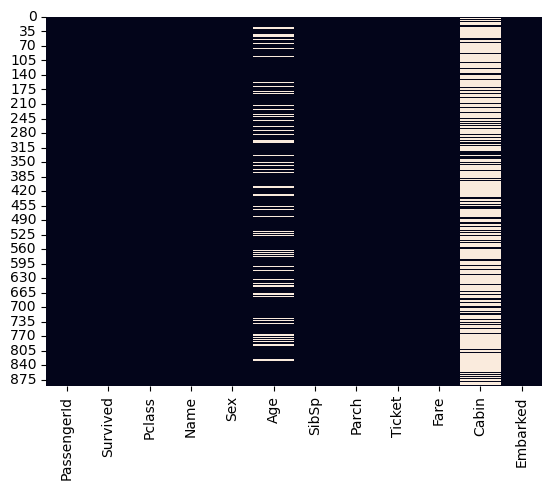

In [10]:
sns.heatmap(train_data.isnull(),cbar=False)

<Axes: >

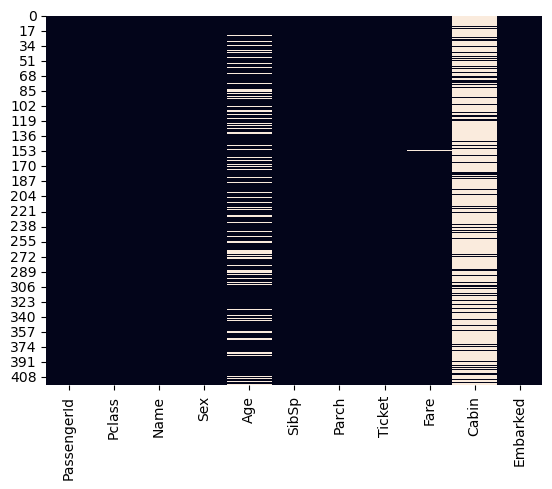

In [11]:
sns.heatmap(test_data.isnull(),cbar=False)

**Train data Thoughts** :

* 'Cabin'은 77%가 존재하지 않으므로 삭제해준다. 
* 'Age'값은 19%가 존재하지 않으므로 보정해줘야 한다. 
* 'Embarked'의 빈 값 2개는 최빈값으로 보정해준다. 

**Test data Thoughts** :

* 'Cabin'은 78%가 존재하지 않으므로 삭제해준다.  
* 'Age'값은 20%가 존재하지 않으므로 보정해줘야 한다. 
* 'Fare'의 빈 값 1개는 중앙값으로 보정해준다. 

In [12]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 3. Data analysis

## 3.1. PassengerId

- 불필요하기 때문에 삭제

In [13]:
train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2.2. Pclass

In [14]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

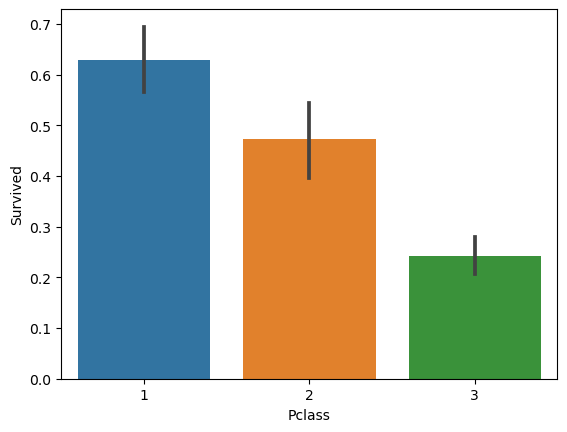

In [15]:
# plot

sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

- 1등급, 2등급, 3등급 순으로 생존율이 낮아진다.

## 2.3. Name

* 'Total'이라는 새로운 변수를 생성해 Mrs, Ms와 같이 구분해준다.
* Name을 drop한다. 

In [16]:
train_data['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [17]:
train_data['Title']=0
for i in train_data:
    train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
test_data['Title']=0
for i in test_data:
    test_data['Title']=test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<Axes: xlabel='Title', ylabel='Survived'>

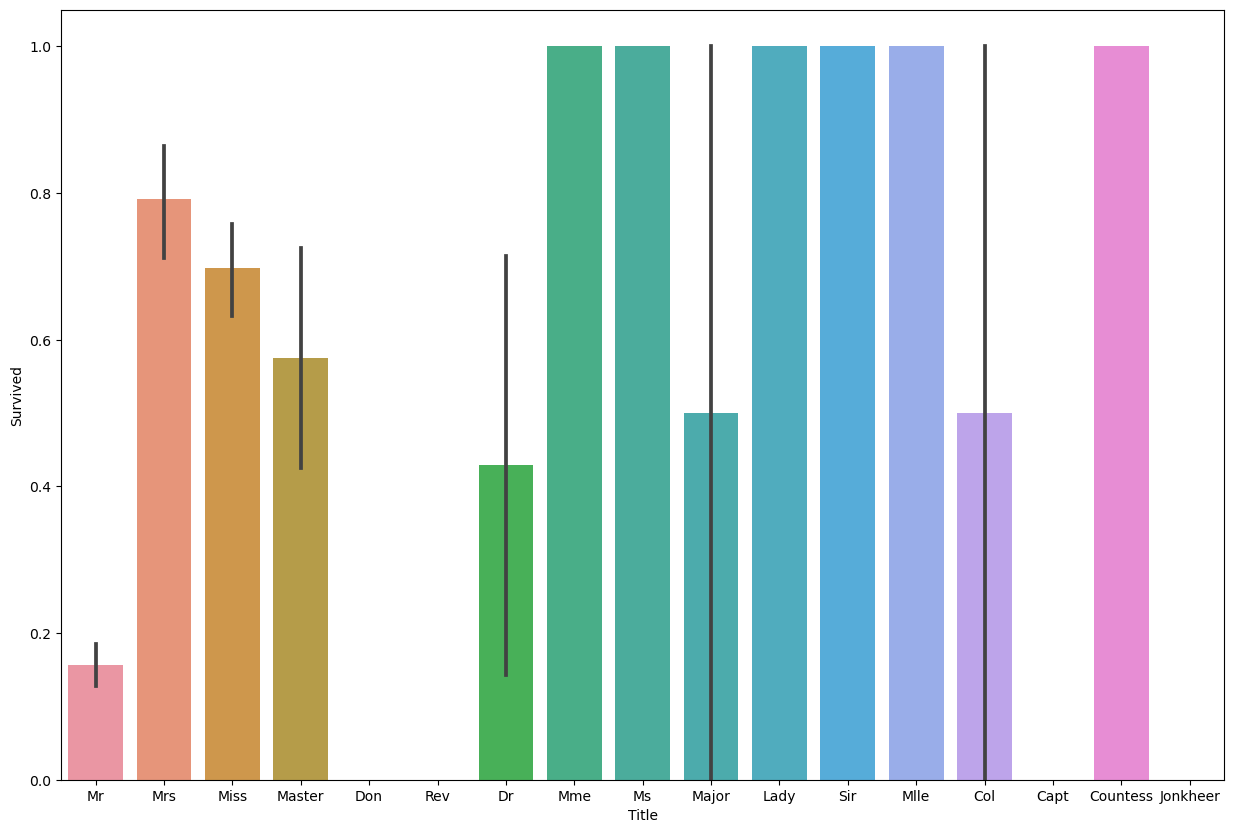

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=train_data['Title'], y=train_data['Survived'])

In [19]:
train_data['Title']=pd.Categorical(train_data['Title'])
train_data.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
Title       category
dtype: object

In [20]:
test_data['Title']=pd.Categorical(test_data['Title'])
print (test_data.dtypes)
print ('-----------')
test_data.head()

Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
Title       category
dtype: object
-----------


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


## 2.4. Sex

**Observations** 
 - 여자가 남자에 비해 생존율이 높다.

In [21]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

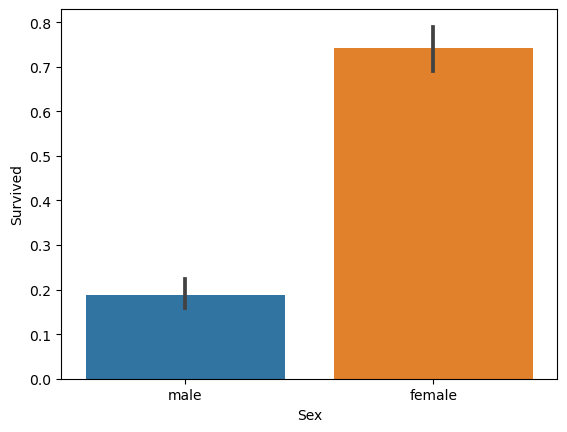

In [22]:
#plot

sns.barplot(x=train_data['Sex'], y=train_data['Survived'])

- 남성에 비해 여성이 생존율이 더 높은 것을 알 수 있다.
- 성별이 생존율에 가장 영향을 많이 미친다는 사실을 알 수 있다. 

<Axes: xlabel='Pclass', ylabel='Survived'>

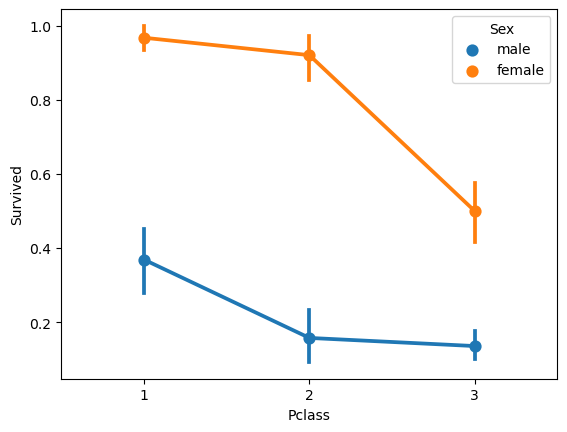

In [23]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_data)

Pclass와 성별을 비교했을 때 1등급에 탄 여성이 1등급에 탄 남성에 비해 월등하게 높은 비율로 생존했음을 알 수 있다. 여성의 경우 1, 2등급에 탄 승객들은 80% 이상의 높은 생존 확률을 가졌음을 알 수 있다. 

## 2.5. Age

* Missing data 값이 총 19%이므로 보정해주는 과정을 가져야한다.


**Observations** 
 - 나이가 어리면(15세 이하) 생존율이 높다.
 - 나이가 많으면(50세 이상) 생존율이 높다.

<Axes: xlabel='Age'>

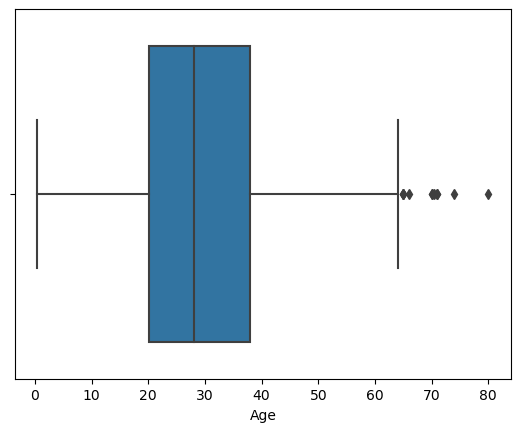

In [24]:
sns.boxplot(x=train_data['Age'])

In [25]:
means = train_data.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [26]:
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [27]:
idx_nan_age = train_data.loc[np.isnan(train_data['Age'])].index
train_data.loc[idx_nan_age, 'Age'].loc[idx_nan_age] = train_data['Title'].loc[idx_nan_age].map(map_means)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [28]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

train_data['Title'] = train_data['Title'].map(titles_dict)
train_data['Title']=pd.Categorical(train_data['Title'])

In [29]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Title == "Mr"), 'Age'] = 33
train_data.loc[(train_data.Age.isnull()) & (train_data.Title == "Mrs"), 'Age'] = 36
train_data.loc[(train_data.Age.isnull()) & (train_data.Title == "Master"), 'Age'] = 5
train_data.loc[(train_data.Age.isnull()) & (train_data.Title == "Miss"), 'Age'] = 22
train_data.loc[(train_data.Age.isnull()) & (train_data.Title == "Other"), 'Age'] = 46

In [30]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

test_data['Title'] = test_data['Title'].map(titles_dict)
test_data['Title']=pd.Categorical(test_data['Title'])

In [31]:
means = test_data.groupby('Title')['Age'].mean()
means.head()

Title
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Other     40.750000
Name: Age, dtype: float64

In [32]:
test_data.loc[(test_data.Age.isnull()) & (test_data.Title == "Mr"), 'Age'] = 32
test_data.loc[(test_data.Age.isnull()) & (test_data.Title == "Mrs"), 'Age'] = 39
test_data.loc[(test_data.Age.isnull()) & (test_data.Title == "Master"), 'Age'] = 7
test_data.loc[(test_data.Age.isnull()) & (test_data.Title == "Miss"), 'Age'] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data.Title == "Other"), 'Age'] = 41

'Title'을 통해 나이 결측치를 정제하는 과정을 마쳤으니 Name을 삭제한다. 

In [33]:
train_data.drop('Name', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [34]:
test_data.drop('Name', axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,3,male,27.0,0,0,315154,8.6625,S,Mr
4,3,female,22.0,1,1,3101298,12.2875,S,Mrs


<Axes: xlabel='Age', ylabel='Survived'>

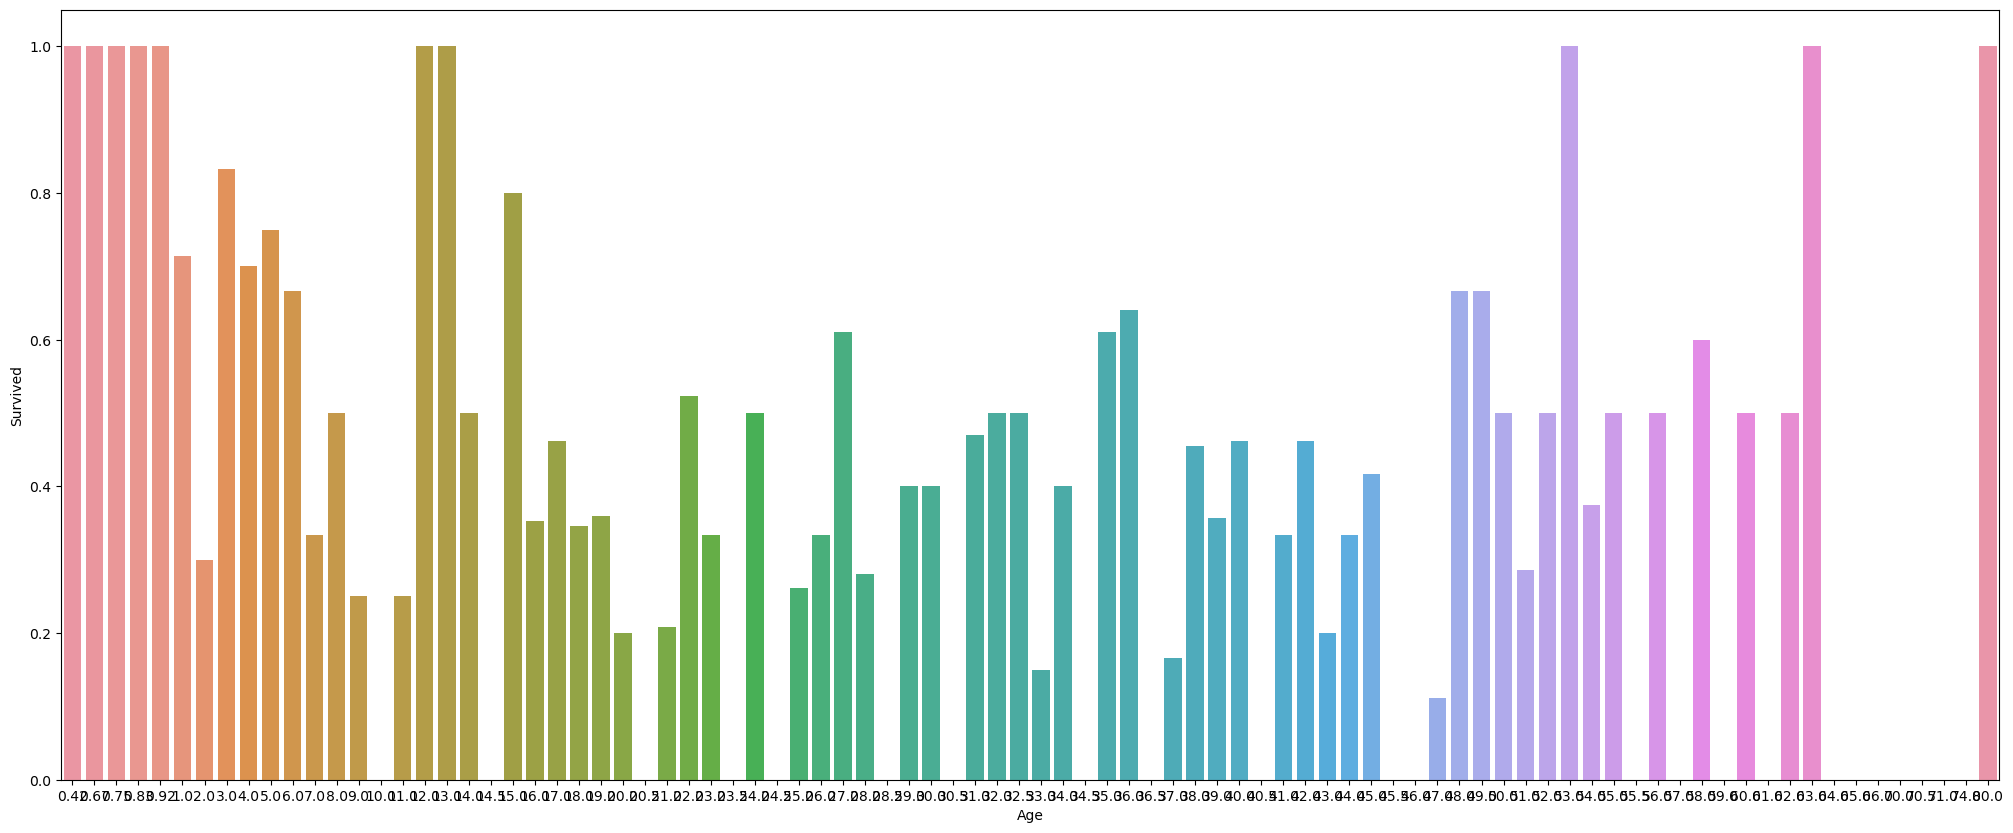

In [35]:
#plot

plt.figure(figsize=(25, 10))
sns.barplot(x=train_data['Age'], y=train_data['Survived'], errorbar=None)

* 0 ~15 / 15 ~ 50 / 50 ~ 80 으로 범위를 나눌 수 있다. 

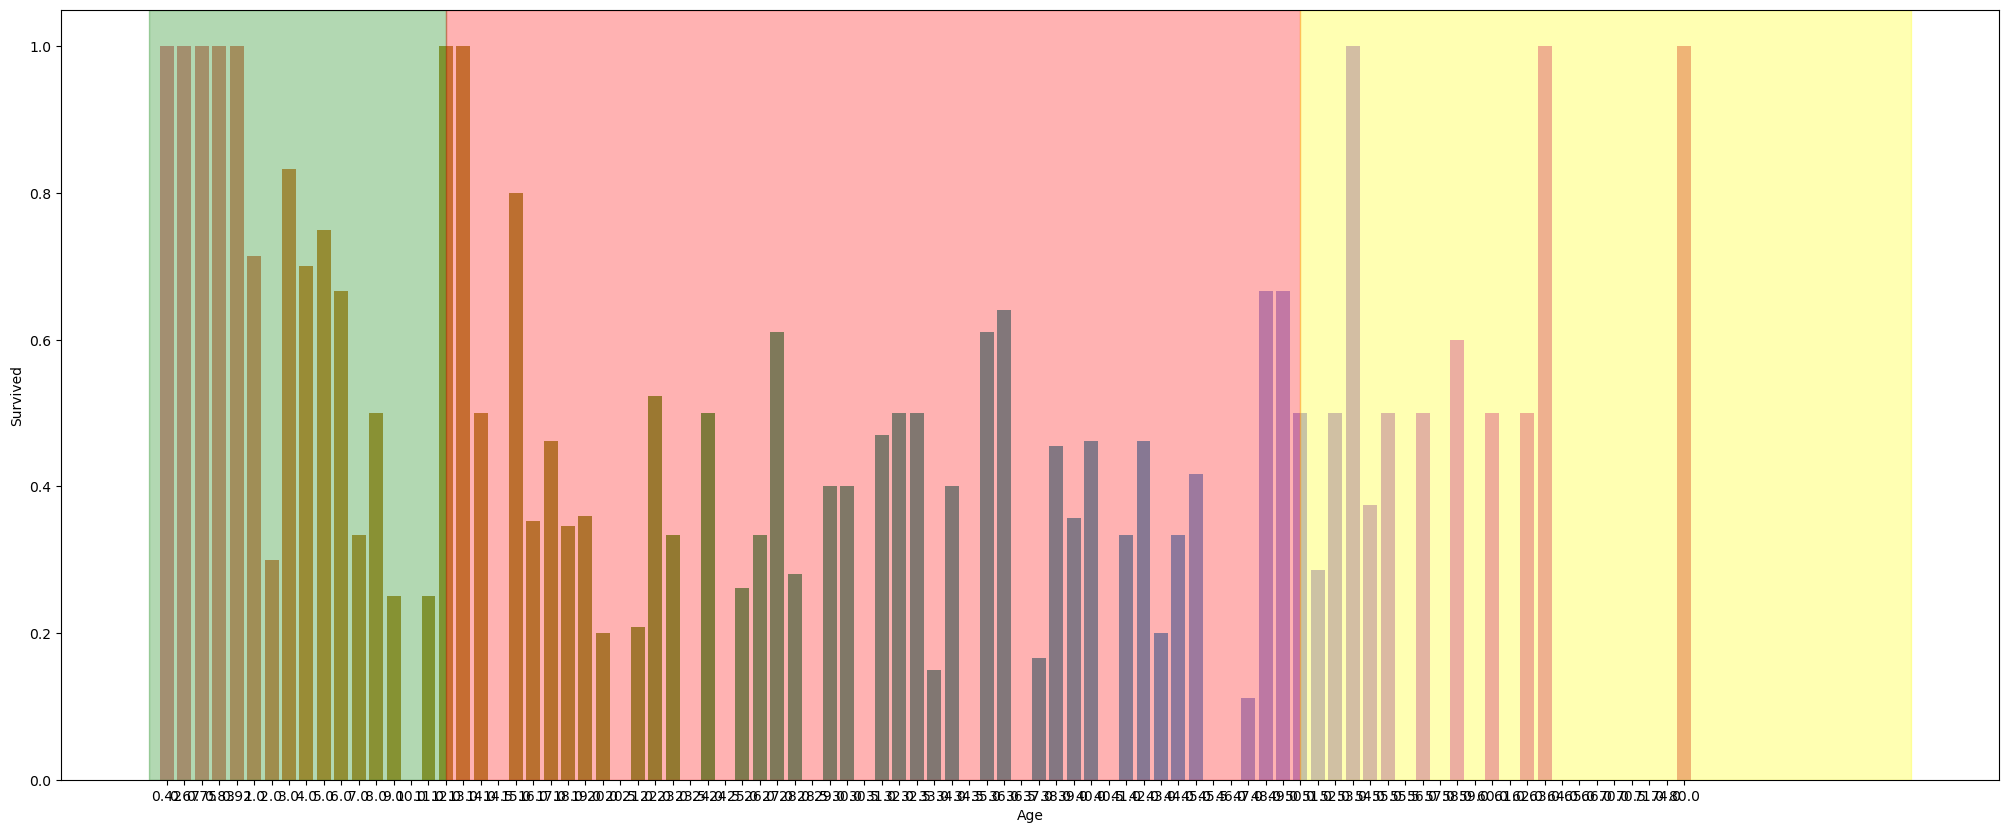

In [36]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(train_data[train_data['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(train_data[train_data['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(x=train_data['Age'], y=train_data['Survived'], errorbar=None)

plt.axvspan(-1, x_limit_1, alpha=0.3, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.3, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.3, color='yellow')

In [37]:
train_data['Age_cat'] = pd.cut(train_data['Age'], bins=[0, 12, 50, 200], labels=['Child', 'Adult', 'Elder'])
train_data['Age_cat'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age_cat, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elder']

<Axes: xlabel='Age_cat', ylabel='Survived'>

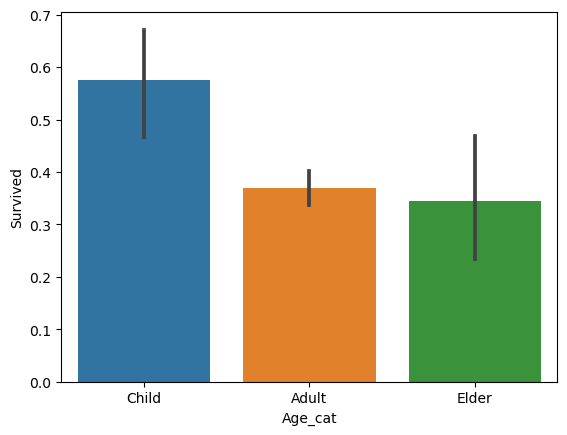

In [38]:
#plot

sns.barplot(x=train_data['Age_cat'], y=train_data['Survived'])

0~15세 아이들이 가장 높은 생존율을 보여준다. 가설과 달리 50세 이상의 노인들은 낮은 생존율을 보여준다. 

In [39]:
train_data.drop('Age_cat', axis=1, inplace=True)

## 2.6. SibSp & Parch

**observation**

    * 같이 탄 가족 수가 생존율에 영향을 미칠 것이다. (아이들은 부모와 같이 탔을 경우가 많으니 'Parch' 값이  높을수록 생존율이 높을 것이다.

In [40]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [41]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### create FamilySize

- SibSp와 Parch를 합쳐 가족 사이즈를 알아본다.

In [42]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,A/5 21171,7.2500,S,Mr,1
1,1,1,female,38.0,PC 17599,71.2833,C,Mrs,1
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,female,35.0,113803,53.1000,S,Mrs,1
4,0,3,male,35.0,373450,8.0500,S,Mr,0


In [43]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

test_data.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,3,male,34.5,330911,7.8292,Q,Mr,0
1,3,female,47.0,363272,7.0000,S,Mrs,1
2,2,male,62.0,240276,9.6875,Q,Mr,0
3,3,male,27.0,315154,8.6625,S,Mr,0
4,3,female,22.0,3101298,12.2875,S,Mrs,2


In [44]:
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

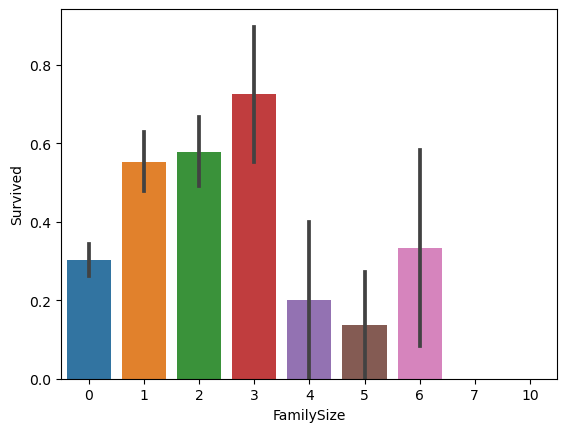

In [45]:
#plot

sns.barplot(x=train_data['FamilySize'], y=train_data['Survived'])

In [46]:
train_data['FamilySize'].loc[train_data['FamilySize'] > 0] = 1
train_data['FamilySize'].loc[train_data['FamilySize'] == 0] = 0

C:\Users\syu\AppData\Local\Temp\ipykernel_9412\606637713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FamilySize'].loc[train_data['FamilySize'] > 0] = 1
C:\Users\syu\AppData\Local\Temp\ipykernel_9412\606637713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FamilySize'].loc[train_data['FamilySize'] == 0] = 0


<Axes: xlabel='FamilySize', ylabel='Survived'>

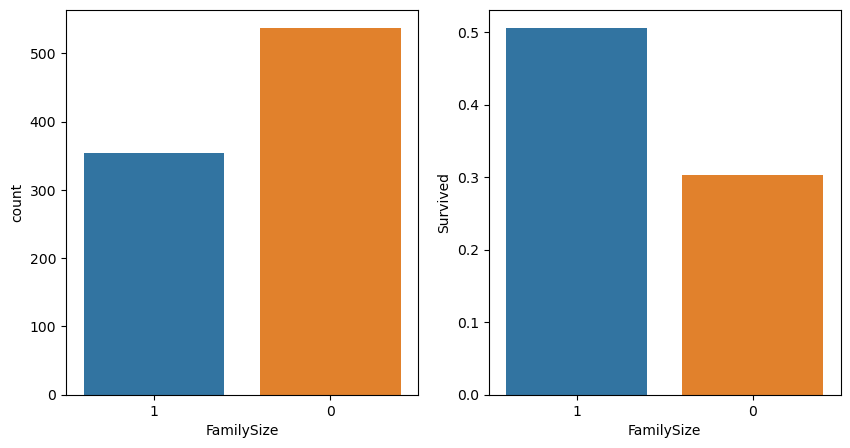

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='FamilySize', data=train_data, order=[1,0], ax=axis1)
family_perc = train_data[["FamilySize", "Survived"]].groupby(['FamilySize'],as_index=False).mean()
sns.barplot(x='FamilySize', y='Survived', data=family_perc, order=[1,0], ax=axis2)

가족이 같이 탑승했던 사람들이 생존 확률이 높았다는 것을 알 수 있다. 

## 2.7. Ticket
<br>
티켓 대신 요금, 그리고 선박장, Pclass가 대신할 수 있을거라 생각해 데이터를 삭제했다. 

In [48]:
train_data.drop('Ticket', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0


In [49]:
test_data.drop('Ticket', axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,male,34.5,7.8292,Q,Mr,0
1,3,female,47.0,7.0000,S,Mrs,1
2,2,male,62.0,9.6875,Q,Mr,0
3,3,male,27.0,8.6625,S,Mr,0
4,3,female,22.0,12.2875,S,Mrs,2


## 2.8. Fare
<br>

**observation**

    * 요금을 많이 낸 사람들은 높은 등급의 좌석에 앉았을 확률이 높을 것이다.
    * 높은 등급의 좌석에 앉은 사람이 (=높은 요금을 낸 사람이) 생존 확률이 높았을 것이다.

<Axes: xlabel='Survived', ylabel='Fare'>

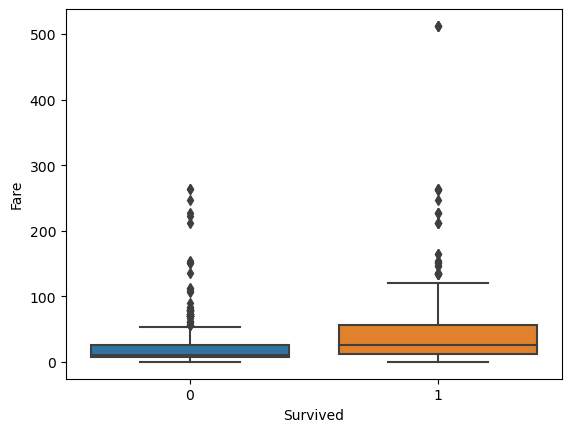

In [50]:
sns.boxplot(x=train_data['Survived'], y=train_data['Fare'])

<Axes: xlabel='Survived', ylabel='Fare'>

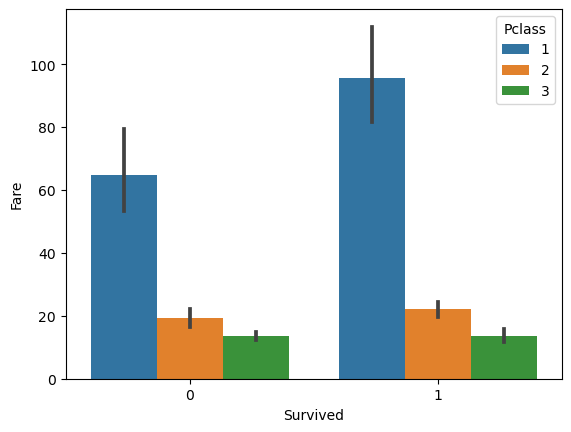

In [51]:
sns.barplot( x=train_data['Survived'], y=train_data['Fare'], hue=train_data['Pclass'] )

1등급 좌석에 앉을수록 요금을 높게 지불했다는 가정은 맞았다. 또한, 생존 확률을 비교해보았을 때 2등급, 3등급에 앉은 사람들에 비해 많이 살아남았음을 알 수 있다. 

<br> test data의 Fare의 결측값 1개는 Fare의 중앙값으로 대신한다. 

In [52]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

## 2.8. Embarked

<br>
2개의 결측치는 가장 많이 도착 예정인 항구로 설정한다. 

**observation**

    * 높은 요금을 지불한 사람들이 가장 많이 도착하는 항구는 비싼 동네(물가가 높은 동네)일 것이다.
    * 물가가 높은 동네에 갈 예정이었던 승객들이 생존율이 높았을 것이다.

In [53]:
train_data['Embarked'].fillna('S', inplace=True)

<Axes: xlabel='Survived', ylabel='Fare'>

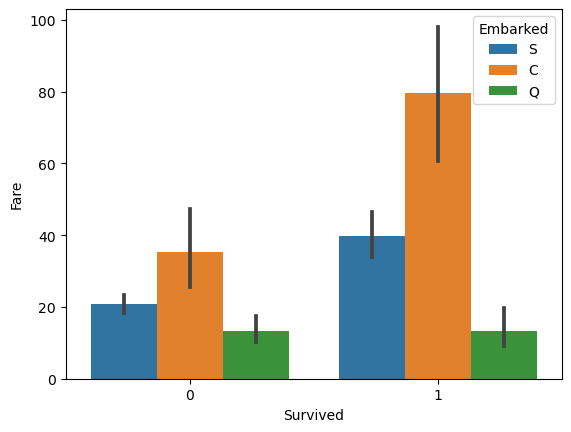

In [54]:
sns.barplot( x=train_data['Survived'], y=train_data['Fare'], hue=train_data['Embarked'] )

C 항구에 도착할 승객들은 높은 비용을 지불했음이 나타났다. 생존확률이 높은 것으로 따라 비싼 요금을 지불한 승객들은 C 항구에 도착할 예정이었으며 그들은 높은 확률로 생존했음을 알 수 있다. 

# 3. Model, predict and solve
<br>

데이터 분석을 통해 Pclass와 Fare, 그리고 Embarked가 관계가 존재했음을 알 수 있었다. 여성의 경우 다른 변수와의 관계에 상관없이 생존율이 높았음을 알 수 있었다. 또한, 15세 이하의 어린이들이 생존율이 높았음을 알 수 있었다. 다양한 머신러닝 모델을 통해 생존율을 예측할 예정이다.
<br>
크게 3가지 모델을 진행할 예정이다. 
1. 회귀분석
2. 랜덤포레스트

## 3.1. 원핫인코딩 및 수치화
<br>

머신러닝 모델링 작업하기 직전에 수치화와 원핫인코딩 작업을 진행해주어야 한다. 모델을 돌리기 위해서는 object가 아닌 숫자로 인식이 되어야 하고, 0과 1인 벡터 표현을 진행해 더 간단하게 만들어주어야 컴퓨터, 기계가 원활하게 처리해줄 수 있기 때문이다.

In [55]:
train_data.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Title         category
FamilySize       int64
dtype: object

In [56]:
test_data.dtypes

Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Title         category
FamilySize       int64
dtype: object

In [57]:
combine = [train_data, test_data]

In [58]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [59]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [60]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [61]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [62]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [63]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0,0,1.0,1
1,1,1,1,2.0,3,1,3.0,1
2,1,3,1,1.0,1,0,2.0,0
3,1,1,1,2.0,3,0,3.0,1
4,0,3,0,2.0,1,0,1.0,0


## 3.2. 머신러닝 모델

In [64]:
x_train = train_data

In [65]:
y_train = x_train['Survived']
x_train = x_train.drop('Survived', axis=1)

In [66]:
x_test = test_data

### 3.3.1. 회귀모델 

**observation**

    1. 연속적인 값을 추정하는 모델이기 때문에 생존을 했느냐, 안 했느냐와 같이 이분법적인 사고를 해야 하는 이 데이터와는 적합하지 않을 것이다.

In [67]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction=model.predict(x_test)

In [68]:
model.score(x_train, y_train)

0.8148148148148148

81%의 점수로 회귀모델을 활용한 측정 결과가 나왔다.

In [69]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.782167
5,Title,0.856006
4,Embarked,0.362801
2,Age,-0.026081
3,Fare,-0.106090
6,FamilySize,-0.329124
0,Pclass,-1.222313


성별이 가장 큰 연관성을 가진 것으로 결과가 도출되었다. 회귀분석을 사용한 결과 성별이 생존율에 가장 큰 영향을 미쳤다는 것을 알 수 있다.

### 3.3.2. 랜덤포레스트

In [70]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [71]:
model.score(x_train, y_train)

0.8709315375982043

87%의 점수로 랜덤포레스트를 활용한 측정 결과가 나왔다.